In [1]:
API = 'https://api.helium.io/'

In [2]:
import requests

In [3]:
r = requests.get('https://api.helium.io/v1/locations/8c08866198e4bff')

In [4]:
r.json()

{'data': {'short_street': 'Skeppargatan',
  'short_state': 'Stockholms län',
  'short_country': 'SE',
  'short_city': 'Östermalm',
  'long_street': 'Skeppargatan',
  'long_state': 'Stockholms län',
  'long_country': 'Sweden',
  'long_city': 'Östermalm',
  'location': '8c08866198e4bff',
  'city_id': 'w7ZzdGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg'}}

In [5]:
r = requests.get('https://api.helium.io/v1/stats')

In [6]:
r.json()

{'data': {'token_supply': 86234792.88596836,
  'state_channel_counts': {'last_week': {'num_packets': 3986732,
    'num_dcs': 5326468},
   'last_month': {'num_packets': 24026055, 'num_dcs': 40172488},
   'last_day': {'num_packets': 596918, 'num_dcs': 698932}},
  'fees': {'last_week': {'transaction': 810965000, 'staking': 18372000000},
   'last_month': {'transaction': 2495430000, 'staking': 45647000000},
   'last_day': {'transaction': 87865000, 'staking': 1313000000}},
  'election_times': {'last_week': {'stddev': 3103.940709605085,
    'avg': 3022.03},
   'last_month': {'stddev': 2279.879201177918, 'avg': 2859.734513274336},
   'last_hour': {'stddev': None, 'avg': None},
   'last_day': {'stddev': 1684.183757364804, 'avg': 2914.0}},
  'counts': {'transactions': 57009456,
   'hotspots': 34617,
   'countries': 70,
   'consensus_groups': 21512,
   'cities': 4477,
   'challenges': 21231818,
   'blocks': 838830},
  'challenge_counts': {'last_day': 65041, 'active': 0},
  'block_times': {'last_w

In [7]:
r = requests.get('https://api.helium.io/v1/hotspots/name/small-leather-nuthatch')

In [8]:
r.json()

{'data': [{'lng': 18.09012557886758,
   'lat': 59.34257271627216,
   'timestamp_added': '2020-10-02T10:32:05.000000Z',
   'status': {'online': 'online',
    'listen_addrs': ['/p2p/112qNM4h9iwaFD74i4NT4Qs4f1fGKtoEE7vSrpNYCUUUJyktT8V8/p2p-circuit/p2p/112ZdtYTRoSQrXm3XthtUqQMP7BfmMzpMncKdUZxGxkPLJYCWrfg'],
    'height': 838692},
   'reward_scale': 0.18115234375,
   'owner': '14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU',
   'nonce': 1,
   'name': 'small-leather-nuthatch',
   'location': '8c08866198e4bff',
   'last_poc_challenge': 838602,
   'last_change_block': 838738,
   'geocode': {'short_street': 'Skeppargatan',
    'short_state': 'Stockholms län',
    'short_country': 'SE',
    'short_city': 'Östermalm',
    'long_street': 'Skeppargatan',
    'long_state': 'Stockholms län',
    'long_country': 'Sweden',
    'long_city': 'Östermalm',
    'city_id': 'w7ZzdGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg'},
   'gain': 12,
   'elevation': 0,
   'block_added': 526389,
   'block': 838834,
   'a

In [9]:
results = []
cursor=''

In [10]:
while cursor is not None:
    if cursor:
        r = requests.get('https://api.helium.wtf/v1/cities?cursor={}'.format(cursor))
        cursor = r.json()['cursor']
        results.append(r.json())
    else:
        break

KeyError: 'cursor'

In [12]:
len(results)

49

In [13]:
results[0]['data'][1].keys()

dict_keys(['short_state', 'short_country', 'short_city', 'online_count', 'offline_count', 'long_state', 'long_country', 'long_city', 'hotspot_count', 'city_id'])

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame(columns=results[0]['data'][1].keys())

In [16]:
df

,short_state,short_country,short_city,online_count,offline_count,long_state,long_country,long_city,hotspot_count,city_id


In [17]:
d2 = {}

In [18]:
i=0

In [19]:

for res in results:
    for x in res['data']:
        i=i+1
        d2[i] = x

In [20]:
df = pd.DataFrame.from_dict(d2, orient='index')

In [21]:
df.to_csv('hotspot_count_city')

In [22]:
import pandas as pd
df = pd.read_csv('hotspot_count_city')

In [23]:
df[df['short_country']=='SE']['hotspot_count'].sum()

292

In [24]:
df[df['short_country']=='SE']['long_state'].value_counts()

Västra Götalands län    34
Stockholms län          31
Uppsala län             15
Skåne län               12
Östergötlands län        5
Västmanlands län         5
Kalmar län               3
Västerbottens län        2
Södermanlands län        1
Norrbottens län          1
Värmlands län            1
Gävleborgs län           1
Name: long_state, dtype: int64

In [25]:
df_swe = df[df['short_country']=='SE']

In [26]:
df_swe['city_id'].value_counts()

ZmxvZ3N0YXVwcHNhbGEgbMOkbnN3ZWRlbg                              1
YmVzdG9ycC1hbm5lYm9yZ3bDpHN0cmEgZ8O2dGFsYW5kcyBsw6Ruc3dlZGVu    1
dHJhbmRhcmVkdsOkc3RyYSBnw7Z0YWxhbmRzIGzDpG5zd2VkZW4             1
ZG90b3JwLXJhbnRlbnbDpHN0cmEgZ8O2dGFsYW5kcyBsw6Ruc3dlZGVu        1
bm9ycm1hbG1zdG9ja2hvbG1zIGzDpG5zd2VkZW4                         1
                                                               ..
am9oYW5uZWJlcmd2w6RzdHJhIGfDtnRhbGFuZHMgbMOkbnN3ZWRlbg          1
YnLDpG1hcmVnw6VyZGVudsOkc3RyYSBnw7Z0YWxhbmRzIGzDpG5zd2VkZW4     1
dsOkcm5oZW1za8OlbmUgbMOkbnN3ZWRlbg                              1
a3ZpbGxlYsOkY2tlbnbDpHN0cmEgZ8O2dGFsYW5kcyBsw6Ruc3dlZGVu        1
ZsOlbGhhZ2VudXBwc2FsYSBsw6Ruc3dlZGVu                            1
Name: city_id, Length: 111, dtype: int64

In [27]:
r = requests.get('https://api.helium.io/v1/cities/{}/hotspots'.format(df_swe['city_id'].iloc[0]))
r.json()['data']

[{'lng': 20.301440653255145,
  'lat': 63.81434706697964,
  'timestamp_added': '2020-10-30T07:29:20.000000Z',
  'status': {'online': 'online',
   'listen_addrs': ['/ip4/87.96.151.71/tcp/56801'],
   'height': 838770},
  'reward_scale': 0.5,
  'owner': '132F1Ad16kiwoBQ77kw3yMCUdnyTBi3xxgEyC1nXxNsbpRxuZ1K',
  'nonce': 4,
  'name': 'mysterious-iron-crab',
  'location': '8c08f62cec497ff',
  'last_poc_challenge': 838605,
  'last_change_block': 838655,
  'geocode': {'short_street': 'Klintvägen',
   'short_state': 'Västerbottens län',
   'short_country': 'SE',
   'short_city': 'Ålidhem',
   'long_street': 'Klintvägen',
   'long_state': 'Västerbottens län',
   'long_country': 'Sweden',
   'long_city': 'Ålidhem',
   'city_id': 'w6VsaWRoZW12w6RzdGVyYm90dGVucyBsw6Ruc3dlZGVu'},
  'gain': 70,
  'elevation': 20,
  'block_added': 565975,
  'block': 838835,
  'address': '11B3w7ixQEEPdyhuJDLtceEXg4qUzcJCLv5PVzBSQJUkn3Y7hjH'},
 {'lng': 20.29318563492533,
  'lat': 63.81382365638192,
  'timestamp_added': '2

In [28]:
for c in pd.unique(df_swe['city_id']):
    r = requests.get('https://api.helium.io/v1/cities/{}/hotspots'.format(c))
    r.json()['data']

In [29]:
r = requests.get('https://api.helium.io/v1/accounts/rich')
g=0
b=0
for idx,i in enumerate(r.json()['data']):
    if i['address'] == '14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU':
        g=idx
        b=i['balance']

In [30]:
g

0

In [31]:
b

0

In [32]:
r = requests.get('https://api.helium.io/v1/accounts/14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU')
r.json()

{'data': {'speculative_sec_nonce': 0,
  'speculative_nonce': 42,
  'sec_nonce': 0,
  'sec_balance': 0,
  'nonce': 42,
  'dc_nonce': 0,
  'dc_balance': 0,
  'block': 838837,
  'balance': 1756680752997,
  'address': '14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU'}}

In [33]:
def req(string):
    r = requests.get(string)
    return r.json()

res = req('https://api.helium.io/v1/accounts/14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU/hotspots')

In [34]:
len(res['data'])

73

In [35]:
res['data'][0]['name']

'muscular-juniper-mongoose'

In [36]:
relay = [res['data'][x]['status']['listen_addrs'] for x in range(len(res['data']))]

In [37]:
l = []
for r in res['data']:
    if r['status']['listen_addrs']:
        if 'p2p' in r['status']['listen_addrs'][0]:
            l.append(r['name'])

In [38]:
pd.DataFrame(l).to_csv('relayed.csv')

In [39]:
l

['muscular-juniper-mongoose',
 'gentle-concrete-swallow',
 'flat-taffy-squid',
 'prehistoric-hazelnut-sheep',
 'nutty-steel-sealion',
 'micro-carob-narwhal',
 'little-paisley-badger',
 'hot-malachite-hawk',
 'quick-zinc-seagull',
 'expert-ultraviolet-huskie',
 'round-lavender-millipede',
 'dandy-maroon-moose',
 'small-leather-nuthatch',
 'plain-fuchsia-alligator']

In [40]:
relay[2]

['/p2p/11AKdVtGj4ng8XkKD5aCMLKa33mm5myGL6wrdagnPspCfhu4Hhn/p2p-circuit/p2p/112uMtzhUEfEV3z1SjuTSKLY1PXJY2tHhorFEPR2SeW9aCJgR2dM']

In [41]:
i=0
for r in relay:
    if r:
        if 'p2p' in r[0]:
            i=i+1

In [42]:
i

14

In [43]:
req('https://api.helium.io/v1/accounts/14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU/rewards/sum?min_time=2020-05-16T19:05:01Z&max_time=2021-03-16T19:05:01Z')

{'meta': {'min_time': '2020-05-16T19:05:01Z',
  'max_time': '2021-03-16T19:05:01Z'},
 'data': {'total': 86410.17565551,
  'sum': 8641017565551,
  'stddev': 1619.82019474,
  'min': 0.07143702,
  'median': 590.145778,
  'max': 8004.94122185,
  'avg': 1183.7010363768493}}

In [44]:
cursor = ''
results = []
while cursor is not None:
    r = req('https://api.helium.io/v1/hotspots?cursor={}'.format(cursor))
    results.append(r['data'])
    try:
        cursor = r['cursor']
    except:
        break


In [45]:
results.append(r['data'])

In [46]:
d3 = {}
res = []
for r in results:
    res = res + r

In [47]:
len(res)

35252

In [48]:
for idx,r in enumerate(res):
    d3[idx] = r

In [49]:
df3 = pd.DataFrame.from_dict(d3, orient='index')

In [50]:
df3_geo = df3['geocode'].apply(pd.Series)

In [51]:
df3_status = df3['status'].apply(pd.Series)

In [52]:
df4 = df3.join(df3_geo).join(df3_status)

In [53]:
df4.shape

(35252, 29)

In [54]:
df4 = df4.drop(['status','geocode'],axis=1)

In [55]:
df4.columns

Index(['lng', 'lat', 'timestamp_added', 'reward_scale', 'owner', 'nonce',
       'name', 'location', 'last_poc_challenge', 'last_change_block', 'gain',
       'elevation', 'block_added', 'block', 'address', 'short_street',
       'short_state', 'short_country', 'short_city', 'long_street',
       'long_state', 'long_country', 'long_city', 'city_id', 'online',
       'listen_addrs', 'height'],
      dtype='object')

In [56]:
df4.to_csv('all_hotspots_may10-2021.csv')

In [57]:
df4_swe = df4[df4['short_country']=='SE']

In [58]:
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
len(df4_swe)

292

In [60]:
df4_swe[df4_swe['owner']=='14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU']['timestamp_added'][::-1]

27057    2020-08-31T12:22:36.000000Z
25944    2020-09-22T19:44:07.000000Z
25398    2020-10-01T17:27:33.000000Z
25394    2020-10-01T18:05:55.000000Z
25391    2020-10-01T18:33:42.000000Z
                    ...             
17009    2021-02-02T16:36:16.000000Z
16951    2021-02-03T08:07:22.000000Z
16950    2021-02-03T08:31:10.000000Z
16851    2021-02-04T22:55:02.000000Z
15539    2021-03-02T19:11:35.000000Z
Name: timestamp_added, Length: 73, dtype: object

In [74]:
dates_galiot

27057   2020-08-31 12:22:36+00:00
25944   2020-09-22 19:44:07+00:00
25398   2020-10-01 17:27:33+00:00
25394   2020-10-01 18:05:55+00:00
25391   2020-10-01 18:33:42+00:00
                   ...           
17009   2021-02-02 16:36:16+00:00
16951   2021-02-03 08:07:22+00:00
16950   2021-02-03 08:31:10+00:00
16851   2021-02-04 22:55:02+00:00
15539   2021-03-02 19:11:35+00:00
Name: timestamp_added, Length: 73, dtype: datetime64[ns, UTC]

In [61]:
dates_full = pd.to_datetime(df4_swe['timestamp_added'])[::-1]

In [62]:
dates_galiot = pd.to_datetime(df4_swe[df4_swe['owner']=='14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU']['timestamp_added'])[::-1]

In [79]:
values_galiot = list(range(1,len(df4_swe[df4_swe['owner']=='14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU'])+1))

In [80]:
values_galiot.append(values_galiot[-1])

ValueError: x and y must have same first dimension, but have shapes (73,) and (74,)

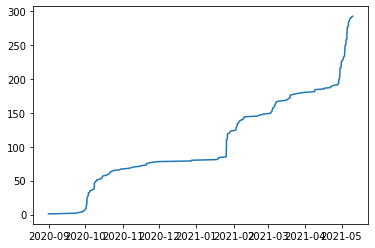

In [81]:
plt.plot(pd.to_datetime(df4_swe['timestamp_added'])[::-1],list(range(1,len(df4_swe)+1)))
plt.plot(dates_galiot,values_galiot)

In [82]:
type(df4_swe['timestamp_added'].iloc[0])

str

In [83]:
df4_swe['timestamp_added']

111      2021-05-10T07:04:45.000000Z
300      2021-05-09T08:27:19.000000Z
435      2021-05-08T17:22:45.000000Z
461      2021-05-08T16:03:55.000000Z
1103     2021-05-07T15:55:10.000000Z
                    ...             
25615    2020-09-28T18:02:13.000000Z
25623    2020-09-28T16:09:41.000000Z
25796    2020-09-25T11:16:32.000000Z
25944    2020-09-22T19:44:07.000000Z
27057    2020-08-31T12:22:36.000000Z
Name: timestamp_added, Length: 292, dtype: object

In [84]:
df4_swe[df4_swe['owner']=='14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU']

,lng,lat,timestamp_added,reward_scale,owner,nonce,name,location,last_poc_challenge,last_change_block,...,short_country,short_city,long_street,long_state,long_country,long_city,city_id,online,listen_addrs,height
15539,17.999661,59.329762,2021-03-02T19:11:35.000000Z,1.000000,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,2,muscular-juniper-mongoose,8c0886602a08dff,838786.0,838836,...,SE,Kungsholmen,Orvar Odds väg,Stockholms län,Sweden,Kungsholmen,a3VuZ3Nob2xtZW5zdG9ja2hvbG1zIGzDpG5zd2VkZW4,online,[/p2p/112EkKU17MbgKtuCwcKQF1HoYAn1ExHbSAJXRgZX...,838716.0
16851,17.920999,59.526501,2021-02-04T22:55:02.000000Z,1.000000,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,1,basic-goldenrod-donkey,8c08862b1416dff,838580.0,838664,...,SE,Upplands Väsby Västra,Holmvägen,Stockholms län,Sweden,Upplands Väsby Västra,dXBwbGFuZHMgdsOkc2J5IHbDpHN0cmFzdG9ja2hvbG1zIG...,online,[/ip4/84.216.109.60/tcp/41865],838656.0
16950,13.006740,57.729014,2021-02-03T08:31:10.000000Z,0.500000,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,1,gentle-concrete-swallow,8c08b688ec091ff,838727.0,838777,...,SE,Brämhult,Aspgatan,Västra Götalands län,Sweden,Brämhult,YnLDpG1odWx0dsOkc3RyYSBnw7Z0YWxhbmRzIGzDpG5zd2...,online,[/p2p/11AKdVtGj4ng8XkKD5aCMLKa33mm5myGL6wrdagn...,838771.0
16951,18.048405,59.333291,2021-02-03T08:07:22.000000Z,0.543472,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,2,flat-taffy-squid,8c088661dd8d5ff,838807.0,838825,...,SE,Kungsholmen,Pipersgatan,Stockholms län,Sweden,Kungsholmen,a3VuZ3Nob2xtZW5zdG9ja2hvbG1zIGzDpG5zd2VkZW4,online,[/p2p/112u2b57bx6wJiUCMnYReFQw7vDgiVxUB51Kw5mE...,838663.0
17009,18.082757,59.317869,2021-02-02T16:36:16.000000Z,0.543472,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,2,prehistoric-hazelnut-sheep,8c0886618422dff,838662.0,838793,...,SE,Södermalm,Renstiernas gata,Stockholms län,Sweden,Södermalm,c8O2ZGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg,online,[/p2p/112YLHfVhCrA8PC52bYMkmrYAZsMF4vDY3DZcH3p...,838723.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25391,18.029491,59.315812,2020-10-01T18:33:42.000000Z,1.000000,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,1,deep-orchid-loris,8c088661136d7ff,838615.0,838793,...,SE,Södermalm,Bergsundsgatan,Stockholms län,Sweden,Södermalm,c8O2ZGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg,online,[/ip4/188.151.184.92/tcp/18482],838726.0
25394,18.074543,59.317691,2020-10-01T18:05:55.000000Z,0.543472,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,1,sleepy-mahogany-alligator,8c0886618c9ddff,838737.0,838791,...,SE,Södermalm,Svartensgatan,Stockholms län,Sweden,Södermalm,c8O2ZGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg,online,[/ip4/81.228.198.231/tcp/26014],838774.0
25398,18.094980,59.315906,2020-10-01T17:27:33.000000Z,0.543472,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,2,large-fuzzy-porcupine,8c088661ab1d5ff,838674.0,838788,...,SE,Södermalm,Londonviadukten,Stockholms län,Sweden,Södermalm,c8O2ZGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg,online,[/ip4/151.177.68.117/tcp/44158],838780.0
25944,18.021367,59.318484,2020-09-22T19:44:07.000000Z,1.000000,14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVt...,1,bubbly-parchment-moth,8c088660269b1ff,838673.0,838787,...,SE,Södermalm,Pokalvägen,Stockholms län,Sweden,Södermalm,c8O2ZGVybWFsbXN0b2NraG9sbXMgbMOkbnN3ZWRlbg,online,[/ip4/13.48.149.139/tcp/44158],838787.0


In [85]:
df4_swe[df4_swe['owner']=='14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL']

,lng,lat,timestamp_added,reward_scale,owner,nonce,name,location,last_poc_challenge,last_change_block,...,short_country,short_city,long_street,long_state,long_country,long_city,city_id,online,listen_addrs,height
2581,13.374315,57.814623,2021-05-05T09:00:52.000000Z,1.000000,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,formal-amethyst-cottonmouth,8c08b61556f29ff,838603.0,838653,...,SE,Ulricehamn,Gälavägen,Västra Götalands län,Sweden,Ulricehamn,dWxyaWNlaGFtbnbDpHN0cmEgZ8O2dGFsYW5kcyBsw6Ruc3...,online,[/ip4/46.194.150.126/tcp/44158],838777.0
2584,12.952321,57.738563,2021-05-05T08:55:02.000000Z,1.000000,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,sharp-bone-bird,8c08b68aa5203ff,838720.0,838825,...,SE,Norrmalm,Margaretagatan,Västra Götalands län,Sweden,Norrmalm,bm9ycm1hbG12w6RzdHJhIGfDtnRhbGFuZHMgbMOkbnN3ZW...,online,[/ip4/46.194.61.51/tcp/44158],838783.0
2590,12.947781,57.751909,2021-05-05T08:52:32.000000Z,1.000000,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,proud-rosewood-tortoise,8c08b68aab0cdff,838775.0,838825,...,SE,Sjöbo,Björksätersgatan,Västra Götalands län,Sweden,Sjöbo,c2rDtmJvdsOkc3RyYSBnw7Z0YWxhbmRzIGzDpG5zd2VkZW4,online,[/p2p/119yyu2syTFR5vucvnq25kkZKxiEbZpMGZjSgcai...,838783.0
2596,13.413670,57.795443,2021-05-05T08:39:11.000000Z,NaN,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,generous-golden-nightingale,8c08b61535a69ff,NaN,838833,...,SE,Ulricehamn,Boråsvägen,Västra Götalands län,Sweden,Ulricehamn,dWxyaWNlaGFtbnbDpHN0cmEgZ8O2dGFsYW5kcyBsw6Ruc3...,offline,None,830259.0
2598,12.931668,57.717069,2021-05-05T08:31:14.000000Z,1.000000,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,spicy-chartreuse-alpaca,8c08b6884201bff,838714.0,838764,...,SE,Göta,Varbergsvägen,Västra Götalands län,Sweden,Göta,Z8O2dGF2w6RzdHJhIGfDtnRhbGFuZHMgbMOkbnN3ZWRlbg,online,[/p2p/11BW5rWzvcXT9JoVJCVBB8h43aPvRdpMz5UGb3nU...,838771.0
3398,12.900837,57.719216,2021-05-03T17:09:02.000000Z,0.333328,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,skinny-taupe-ostrich,8c08b68a34269ff,838683.0,838825,...,SE,Byttorp,Fjällgatan,Västra Götalands län,Sweden,Byttorp,Ynl0dG9ycHbDpHN0cmEgZ8O2dGFsYW5kcyBsw6Ruc3dlZGVu,online,[/ip4/46.194.161.24/tcp/44158],838712.0
3461,12.979766,57.721687,2021-05-03T15:21:12.000000Z,1.000000,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,vast-blonde-kitten,8c08b6881598bff,838784.0,838834,...,SE,Hulta,Hulta,Västra Götalands län,Sweden,Hulta,aHVsdGF2w6RzdHJhIGfDtnRhbGFuZHMgbMOkbnN3ZWRlbg,online,[/ip4/46.194.62.126/tcp/44158],838806.0
3537,12.949123,57.756581,2021-05-03T13:37:32.000000Z,0.500000,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,late-fiery-swallow,8c08b68a878b1ff,838730.0,838780,...,SE,Sjöbo,Ekängsgatan,Västra Götalands län,Sweden,Sjöbo,c2rDtmJvdsOkc3RyYSBnw7Z0YWxhbmRzIGzDpG5zd2VkZW4,online,[/p2p/112WzFvZFktJH9CPAiPAgXDa7ayvWtAgZvN4NStS...,838706.0
3567,12.943463,57.714136,2021-05-03T11:39:01.000000Z,1.000000,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,immense-amber-bat,8c08b68808361ff,838803.0,838820,...,SE,Göta,Kellgrensgatan,Västra Götalands län,Sweden,Göta,Z8O2dGF2w6RzdHJhIGfDtnRhbGFuZHMgbMOkbnN3ZWRlbg,online,[/ip4/46.194.185.58/tcp/44158],838663.0
3582,12.928046,57.724004,2021-05-03T10:36:34.000000Z,0.833328,14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q9...,1,future-maroon-lynx,8c08b6885c2bdff,838644.0,838694,...,SE,Norrby,Alingsåsvägen,Västra Götalands län,Sweden,Norrby,bm9ycmJ5dsOkc3RyYSBnw7Z0YWxhbmRzIGzDpG5zd2VkZW4,online,[/ip4/46.194.182.239/tcp/44158],838697.0


In [86]:
df4_swe.to_csv('swe_hotspots-may10-2021.csv')

In [87]:
import pandas as pd

df4_swe = pd.read_csv('swe_hotspots-may10-2021.csv')

In [88]:
df4_swe['owner'].value_counts()

14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU    73
13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y    26
14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL    24
14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM    21
13H9ykhRaWw8AVEMqf7rV6Fn9fnLXxZ6G98JEdsA1gdcJKYqQYW    21
13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd    12
13tz7DnGnantw8znr5341HB2Z3AJjQsXBbGi7YQc2D3BCLAUMDf     9
14d7XEZJTsFRytmSuj2Ldtx8WpNnNPwawdEv6yV7C4dLwuV6FYm     8
13rbdSBcshNAkLLJKiBUxzYjRnX3G551AUd1CVGqqe7HExScDc4     6
13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5     5
14BT97xnPZ9YfmeTxmuMhstxB8zHS8FeTUDxqPp38duW7NPHNCg     5
13NCaCjEqGPCrMgEGkzjLEAX3dfaGDNA9SksARATyRgEyxuJLGg     5
14SiXdBfQT15p43yGuHRFwg9ynP3Fx8ELErkbAUH9H326mGtrA4     4
14inhtM57SDS6QL6KLPVQYYcUSZGD7xjB7hndQm6aq8Z67i5u3e     4
1458s75hMn2ANzhRLAnyZeQ1YpKHt7Tak7XG5rwbHK3E5TJnY5F     4
13v9kMn5p1a3Y5vqnPxzqfaiEhhrRBaMLYk7SmiN3pJEx1WmBpT     4
14CuUDZ3rXf8W7VBFJc7eB8VBWZ7cAAEDLgAEDkMGpW7U2uMLMk     3
14DXurfTM8ZRek

# Rewards per hotspot and owner

In [89]:
df4_swe['owner'].value_counts().head(10).index

Index(['14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU',
       '13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y',
       '14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL',
       '14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM',
       '13H9ykhRaWw8AVEMqf7rV6Fn9fnLXxZ6G98JEdsA1gdcJKYqQYW',
       '13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd',
       '13tz7DnGnantw8znr5341HB2Z3AJjQsXBbGi7YQc2D3BCLAUMDf',
       '14d7XEZJTsFRytmSuj2Ldtx8WpNnNPwawdEv6yV7C4dLwuV6FYm',
       '13rbdSBcshNAkLLJKiBUxzYjRnX3G551AUd1CVGqqe7HExScDc4',
       '13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5'],
      dtype='object')

In [90]:
len(list(df4_swe['owner'].value_counts().head(10).index))

10

In [91]:
res = []
d5 = {}
min = '2020-05-30'
max = '2021-06-30'
for owner in list(df4_swe['owner'].value_counts().head(10).index):
    d5[owner]=req('https://api.helium.io/v1/accounts/{owner}/rewards/sum?min_time={min}&max_time={max}'.format(owner=owner,min=min,max=max))['data']
    #d5[owner]=req('https://api.helium.io/v1/accounts/{owner}/rewards/sum?min_time={min}&max_time={max}&bucket=week'.format(owner=owner,min=min,max=max))['data']

In [92]:
df_reward = pd.DataFrame.from_dict(d5,orient='index')

In [93]:
df_reward.to_csv('reward_per_owner.csv')

In [94]:
max_amount = 0
for r in req('https://api.helium.io/v1/hotspots/112uMtzhUEfEV3z1SjuTSKLY1PXJY2tHhorFEPR2SeW9aCJgR2dM/rewards?min_time=2021-02-01&max_time=2021-03-01&cursor=eyJlbmRfYmxvY2siOjY5OTY1OSwiYmxvY2siOjc0MTMwMCwiYW5jaG9yX2Jsb2NrIjo3NDEzMDB9')['data']:
    if r['amount'] > max_amount:
        max_amount = r['amount']

In [95]:
req('https://api.helium.io/v1/accounts/14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU/rewards/sum?min_time=-7%20day')

{'meta': {'min_time': '2021-05-03T12:53:21Z',
  'max_time': '2021-05-10T12:53:21Z'},
 'data': {'total': 2565.12819363,
  'sum': 256512819363,
  'stddev': 28.83643931,
  'min': 0.87742471,
  'median': 24.25832619,
  'max': 125.32628533,
  'avg': 35.626780467083336}}

In [96]:
req('https://api.helium.io/v1/accounts/{owner}/rewards/sum?min_time={min}&max_time={max}')

{'error': 'Bad Request'}

In [97]:
res = []
d6 = {}
min = '-7%20day'
for owner in list(df4_swe['owner'].value_counts().head(10).index):
    d6[owner]=req('https://api.helium.io/v1/accounts/{}/rewards/sum?min_time=-7%20day'.format(owner))['data']

In [98]:
df4_swe['owner'].value_counts().head(10).index

Index(['14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU',
       '13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y',
       '14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL',
       '14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM',
       '13H9ykhRaWw8AVEMqf7rV6Fn9fnLXxZ6G98JEdsA1gdcJKYqQYW',
       '13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd',
       '13tz7DnGnantw8znr5341HB2Z3AJjQsXBbGi7YQc2D3BCLAUMDf',
       '14d7XEZJTsFRytmSuj2Ldtx8WpNnNPwawdEv6yV7C4dLwuV6FYm',
       '13rbdSBcshNAkLLJKiBUxzYjRnX3G551AUd1CVGqqe7HExScDc4',
       '13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5'],
      dtype='object')

In [99]:
df_swe_rewards_last_week = pd.DataFrame.from_dict(d6, orient='index').rename({'index':'owners'},axis=1)

In [100]:
df_swe_rewards_last_week

,total,sum,stddev,min,median,max,avg
14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU,2565.128194,256512819363,28.836439,0.877425,24.258326,125.326285,35.626780
13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y,655.580376,65558037649,37.676381,0.138614,7.894181,125.088050,31.218113
14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL,576.797963,57679796291,13.740113,0.458356,22.743719,52.904742,23.071919
14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM,572.321832,57232183218,32.279918,1.145031,20.336670,123.411916,31.795657
13H9ykhRaWw8AVEMqf7rV6Fn9fnLXxZ6G98JEdsA1gdcJKYqQYW,4334.444504,433444450402,20.925802,0.042068,4.025210,253.004474,10.917996
13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd,499.213319,49921331863,23.968543,0.167214,41.596052,74.032443,41.601110
13tz7DnGnantw8znr5341HB2Z3AJjQsXBbGi7YQc2D3BCLAUMDf,367.420732,36742073199,21.588944,1.712244,49.158812,71.502414,40.824526
14d7XEZJTsFRytmSuj2Ldtx8WpNnNPwawdEv6yV7C4dLwuV6FYm,160.466197,16046619687,27.172668,0.037010,30.595228,70.037491,32.093239
13rbdSBcshNAkLLJKiBUxzYjRnX3G551AUd1CVGqqe7HExScDc4,266.310457,26631045711,37.397219,5.172055,38.508036,99.896502,44.385076
13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5,3643.035898,364303589794,18.282360,0.042692,2.058265,115.671429,11.905346


In [101]:
df_total_swe = df4_swe['owner'].value_counts().head(10)
df_total_swe 

14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU    73
13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y    26
14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL    24
14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM    21
13H9ykhRaWw8AVEMqf7rV6Fn9fnLXxZ6G98JEdsA1gdcJKYqQYW    21
13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd    12
13tz7DnGnantw8znr5341HB2Z3AJjQsXBbGi7YQc2D3BCLAUMDf     9
14d7XEZJTsFRytmSuj2Ldtx8WpNnNPwawdEv6yV7C4dLwuV6FYm     8
13rbdSBcshNAkLLJKiBUxzYjRnX3G551AUd1CVGqqe7HExScDc4     6
13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5     5
Name: owner, dtype: int64

In [102]:

df_total_swe.columns = ['owners','hotspots']

In [103]:
df_weekly_swe = pd.DataFrame(df_total_swe).join(df_swe_rewards_last_week)

In [104]:
df_weekly_swe

,owner,total,sum,stddev,min,median,max,avg
14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU,73,2565.128194,256512819363,28.836439,0.877425,24.258326,125.326285,35.626780
13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y,26,655.580376,65558037649,37.676381,0.138614,7.894181,125.088050,31.218113
14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL,24,576.797963,57679796291,13.740113,0.458356,22.743719,52.904742,23.071919
14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM,21,572.321832,57232183218,32.279918,1.145031,20.336670,123.411916,31.795657
13H9ykhRaWw8AVEMqf7rV6Fn9fnLXxZ6G98JEdsA1gdcJKYqQYW,21,4334.444504,433444450402,20.925802,0.042068,4.025210,253.004474,10.917996
13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd,12,499.213319,49921331863,23.968543,0.167214,41.596052,74.032443,41.601110
13tz7DnGnantw8znr5341HB2Z3AJjQsXBbGi7YQc2D3BCLAUMDf,9,367.420732,36742073199,21.588944,1.712244,49.158812,71.502414,40.824526
14d7XEZJTsFRytmSuj2Ldtx8WpNnNPwawdEv6yV7C4dLwuV6FYm,8,160.466197,16046619687,27.172668,0.037010,30.595228,70.037491,32.093239
13rbdSBcshNAkLLJKiBUxzYjRnX3G551AUd1CVGqqe7HExScDc4,6,266.310457,26631045711,37.397219,5.172055,38.508036,99.896502,44.385076
13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5,5,3643.035898,364303589794,18.282360,0.042692,2.058265,115.671429,11.905346


In [105]:
df_weekly_swe['total']

14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU    2565.128194
13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y     655.580376
14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL     576.797963
14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM     572.321832
13H9ykhRaWw8AVEMqf7rV6Fn9fnLXxZ6G98JEdsA1gdcJKYqQYW    4334.444504
13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd     499.213319
13tz7DnGnantw8znr5341HB2Z3AJjQsXBbGi7YQc2D3BCLAUMDf     367.420732
14d7XEZJTsFRytmSuj2Ldtx8WpNnNPwawdEv6yV7C4dLwuV6FYm     160.466197
13rbdSBcshNAkLLJKiBUxzYjRnX3G551AUd1CVGqqe7HExScDc4     266.310457
13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5    3643.035898
Name: total, dtype: float64

In [106]:
df_weekly_swe['total']/df_weekly_swe['owner']

14Rqw67Er4T4mDitRR5hkvDbefXUhVQGiaVV4yzgSF3sVtu6PfU     35.138742
13Wwpbanr8rMrGPBYajqDTHsScYJAVuXJwSP2hLD3nQk74Zm55y     25.214630
14a1EcchN6gaqHzSh9u2NMuNCSzqWhxU11TWbsJG8Sn9q98bkCL     24.033248
14HzZRyju96jHNPjnk3KZFuz8scmK9q4MTJPr7bYdFEo6WYJEmM     27.253421
13H9ykhRaWw8AVEMqf7rV6Fn9fnLXxZ6G98JEdsA1gdcJKYqQYW    206.402119
13W2BQ5FxQEV4C3PR9nYEC6kywKfNYFFVmHo38UgpLxusX9buCd     41.601110
13tz7DnGnantw8znr5341HB2Z3AJjQsXBbGi7YQc2D3BCLAUMDf     40.824526
14d7XEZJTsFRytmSuj2Ldtx8WpNnNPwawdEv6yV7C4dLwuV6FYm     20.058275
13rbdSBcshNAkLLJKiBUxzYjRnX3G551AUd1CVGqqe7HExScDc4     44.385076
13AvzGLk4ormmqzR1UKL7tSMHv5jkEjsikwoaSkFAzhMRt7dcB5    728.607180
dtype: float64

In [107]:
df_reward = df_reward.rename({'total':'total_hnt_alltime', 'median':'median_alltime', 'avg':'avg_alltime', 'stddev':'stddev_alltime'},axis=1)

In [108]:
df_reward['past_week_hnt'] = df_weekly_swe['total']

In [109]:
df_reward['past_week_hnt_per_hotspot'] = df_weekly_swe['total']/df_weekly_swe['owner']

In [110]:
df_reward['hotspots_owned'] = df4_swe['owner'].value_counts().head(10)

In [111]:
df_reward = df_reward.drop(['sum','min','max'],axis=1)

In [112]:
df_reward.columns

Index(['total_hnt_alltime', 'stddev_alltime', 'median_alltime', 'avg_alltime',
       'past_week_hnt', 'past_week_hnt_per_hotspot', 'hotspots_owned'],
      dtype='object')

In [113]:
df_reward[['hotspots_owned','total_hnt_alltime', 'median_alltime', 'avg_alltime', 'stddev_alltime',
       'past_week_hnt', 'past_week_hnt_per_hotspot']].to_csv('reward_per_owner.csv')